In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import scipy as scp
import umap

In [2]:
pocket_features_no_loops = pd.read_csv('./pocket_features_df_no_loops.csv',index_col=0)

In [3]:
col_data = [ i for i in pocket_features_no_loops.columns if i not in ['class','opening','Lf'] ]
all_atom_data = pocket_features_no_loops[col_data]

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
final_set = pocket_features_no_loops.loc[(pocket_features_no_loops['class'] == 'dn_rd2') | (pocket_features_no_loops['class'] == 'final_set')]
print(len(final_set))

30162


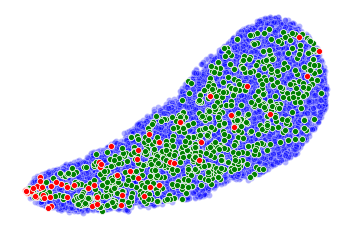

In [5]:
reducer = umap.UMAP(random_state=0, n_neighbors=15, min_dist=0.1)
embedding = reducer.fit_transform(all_atom_data)
pocket_features_no_loops['e1'] = embedding[:,0]
pocket_features_no_loops['e2'] = embedding[:,1]
final_set = pocket_features_no_loops.loc[(pocket_features_no_loops['class'] == 'dn_rd2') | (pocket_features_no_loops['class'] == 'final_set')]
sns.scatterplot(final_set['e1'],final_set['e2'],color='b',marker='o',alpha=0.3)
dn_docked = pocket_features_no_loops.loc[pocket_features_no_loops['class'] == 'dn_docked']
sns.scatterplot(dn_docked['e1'],dn_docked['e2'],color='g',marker='o')
nat = pocket_features_no_loops.loc[pocket_features_no_loops['class'] == 'nat']
sns.scatterplot(nat['e1'],nat['e2'],color='r',marker='o')
plt.axis('off')
plt.show()

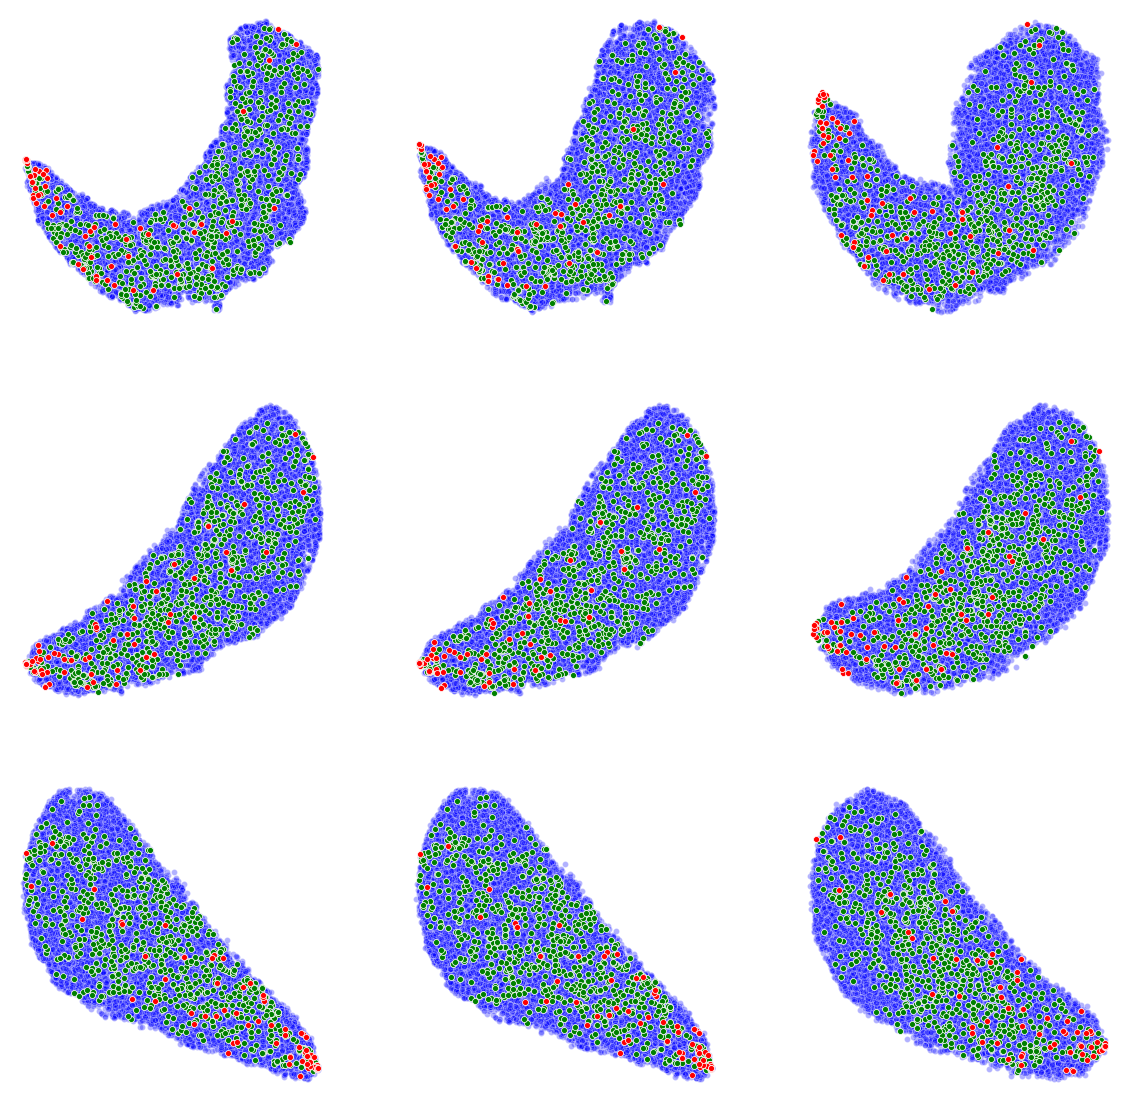

In [10]:
nn = [5, 15, 45]
md = [ 0.05, 0.1, 0.5]

fig, ax = plt.subplots(len(md),len(nn),figsize=(20,20))

for i,n_neighbours in enumerate(nn):
    for j,min_dist in enumerate(md):
        reducer = umap.UMAP(random_state=0, n_neighbors=n_neighbours, min_dist=min_dist)

        embedding = reducer.fit_transform(all_atom_data)

        pocket_features_no_loops['e1'] = embedding[:,0]
        pocket_features_no_loops['e2'] = embedding[:,1]

        # This uses all data not coming from loop positions and ignores the fraction of positions coming from loops
        final_set = pocket_features_no_loops.loc[(pocket_features_no_loops['class'] == 'dn_rd2') | (pocket_features_no_loops['class'] == 'final_set')]
        sns.scatterplot(final_set['e1'],final_set['e2'],color='b',marker='o',alpha=0.3,ax=ax[i][j])
        dn_docked = pocket_features_no_loops.loc[pocket_features_no_loops['class'] == 'dn_docked']
        sns.scatterplot(dn_docked['e1'],dn_docked['e2'],color='g',marker='o',ax=ax[i][j])
        nat = pocket_features_no_loops.loc[pocket_features_no_loops['class'] == 'nat']
        sns.scatterplot(nat['e1'],nat['e2'],color='r',marker='o',ax=ax[i][j])
        ax[i][j].axis('off')
plt.show()



In [6]:
pocket_features = pd.read_csv('./pocket_features_df.csv',index_col=0)

In [7]:
col_data = [ i for i in pocket_features.columns if i not in ['class','opening'] ]
all_atom_data_loop = pocket_features[col_data]

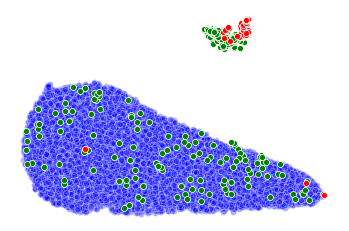

In [8]:
reducer = umap.UMAP(random_state=0, n_neighbors=15, min_dist=0.1)
embedding = reducer.fit_transform(all_atom_data_loop)
pocket_features['e1'] = embedding[:,0]
pocket_features['e2'] = embedding[:,1]
final_set = pocket_features.loc[(pocket_features['class'] == 'dn_rd2') | (pocket_features['class'] == 'final_set')]
sns.scatterplot(final_set['e1'],final_set['e2'],color='b',marker='o',alpha=0.3)
dn_docked = pocket_features.loc[pocket_features['class'] == 'dn_docked']
sns.scatterplot(dn_docked['e1'],dn_docked['e2'],color='g',marker='o')
nat = pocket_features.loc[pocket_features['class'] == 'nat']
sns.scatterplot(nat['e1'],nat['e2'],color='r',marker='o')
plt.axis('off')
plt.show()

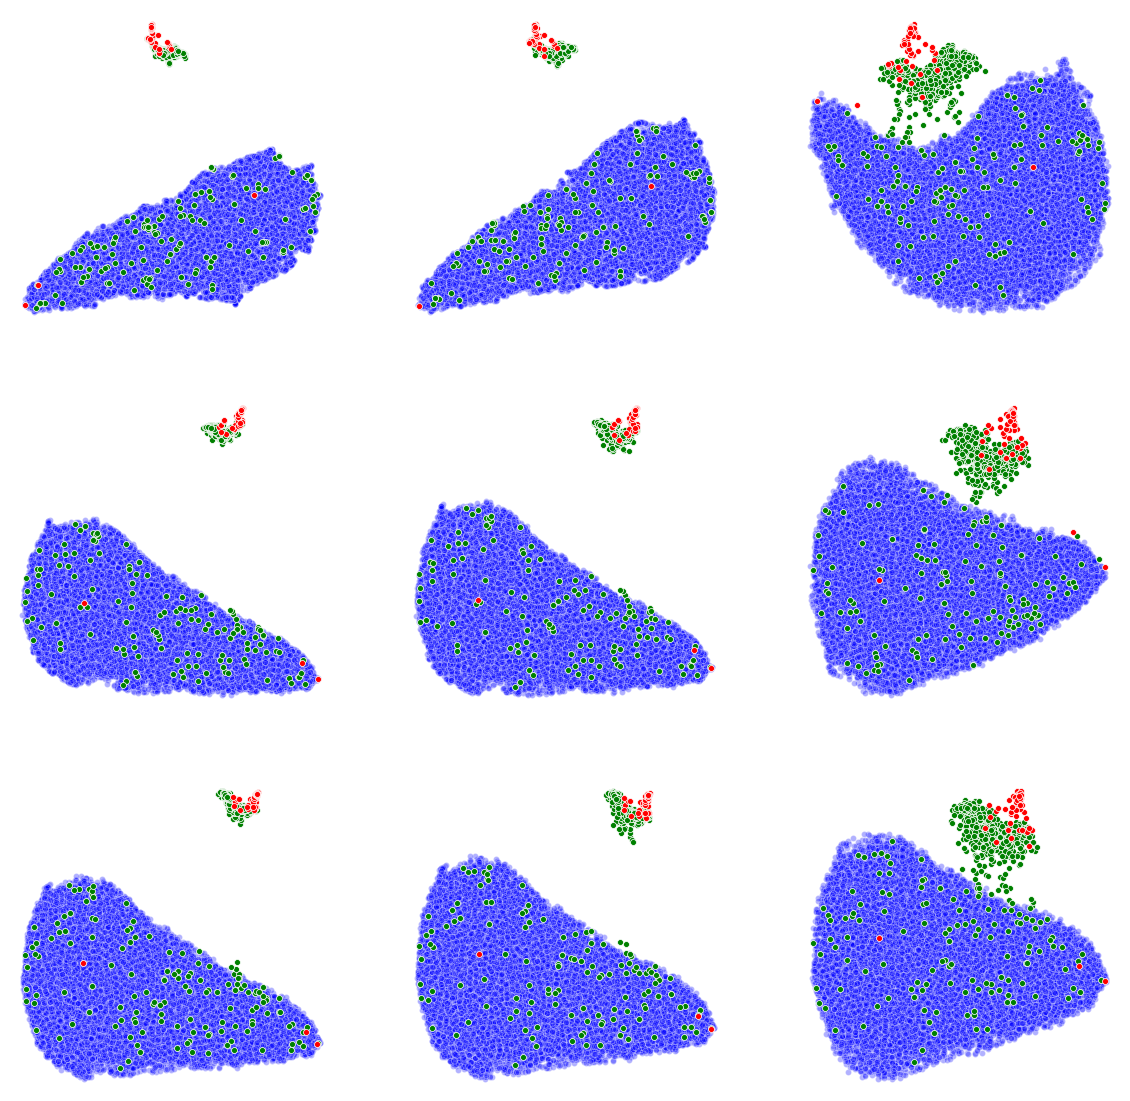

In [23]:
# This uses all data

nn = [5, 15, 45]
md = [ 0.05, 0.1, 0.5]

fig, ax = plt.subplots(len(md),len(nn),figsize=(20,20))

for i,n_neighbours in enumerate(nn):
    for j,min_dist in enumerate(md):
        reducer = umap.UMAP(random_state=0, n_neighbors=n_neighbours, min_dist=min_dist)

        embedding = reducer.fit_transform(all_atom_data_loop)

        pocket_features['e1'] = embedding[:,0]
        pocket_features['e2'] = embedding[:,1]

        final_set = pocket_features.loc[(pocket_features['class'] == 'dn_rd2') | (pocket_features['class'] == 'final_set')]
        sns.scatterplot(final_set['e1'],final_set['e2'],color='b',marker='o',alpha=0.3,ax=ax[i][j])
        dn_docked = pocket_features.loc[pocket_features['class'] == 'dn_docked']
        sns.scatterplot(dn_docked['e1'],dn_docked['e2'],color='g',marker='o',ax=ax[i][j])
        nat = pocket_features.loc[pocket_features['class'] == 'nat']
        sns.scatterplot(nat['e1'],nat['e2'],color='r',marker='o',ax=ax[i][j])
        ax[i][j].axis('off')
plt.show()

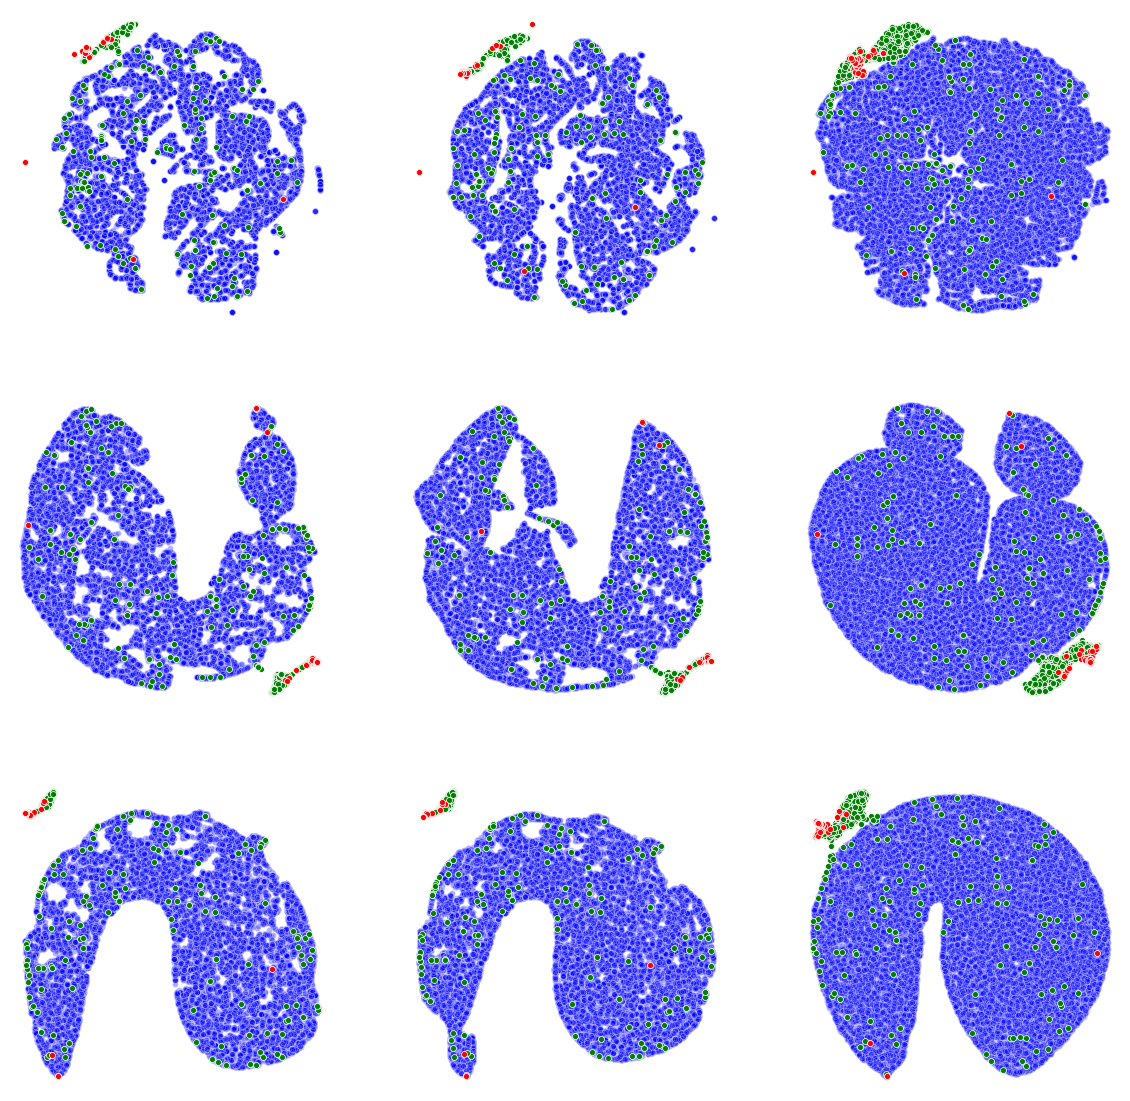

In [24]:
# This uses all data except the fraction of positions coming from each structural element
col_data = [ i for i in pocket_features.columns if i not in ['class','opening','Lf','Hf','Ef'] ]
all_atom_data_loop = pocket_features[col_data]

nn = [5, 15, 45]
md = [ 0.05, 0.1, 0.5]

fig, ax = plt.subplots(len(md),len(nn),figsize=(20,20))

for i,n_neighbours in enumerate(nn):
    for j,min_dist in enumerate(md):
        reducer = umap.UMAP(random_state=0, n_neighbors=n_neighbours, min_dist=min_dist)

        embedding = reducer.fit_transform(all_atom_data_loop)

        pocket_features['e1'] = embedding[:,0]
        pocket_features['e2'] = embedding[:,1]

        # This uses all data not coming from loop positions
        final_set = pocket_features.loc[(pocket_features['class'] == 'dn_rd2') | (pocket_features['class'] == 'final_set')]
        sns.scatterplot(final_set['e1'],final_set['e2'],color='b',marker='o',alpha=0.3,ax=ax[i][j])
        dn_docked = pocket_features.loc[pocket_features['class'] == 'dn_docked']
        sns.scatterplot(dn_docked['e1'],dn_docked['e2'],color='g',marker='o',ax=ax[i][j])
        nat = pocket_features.loc[pocket_features['class'] == 'nat']
        sns.scatterplot(nat['e1'],nat['e2'],color='r',marker='o',ax=ax[i][j])
        ax[i][j].axis('off')
plt.show()

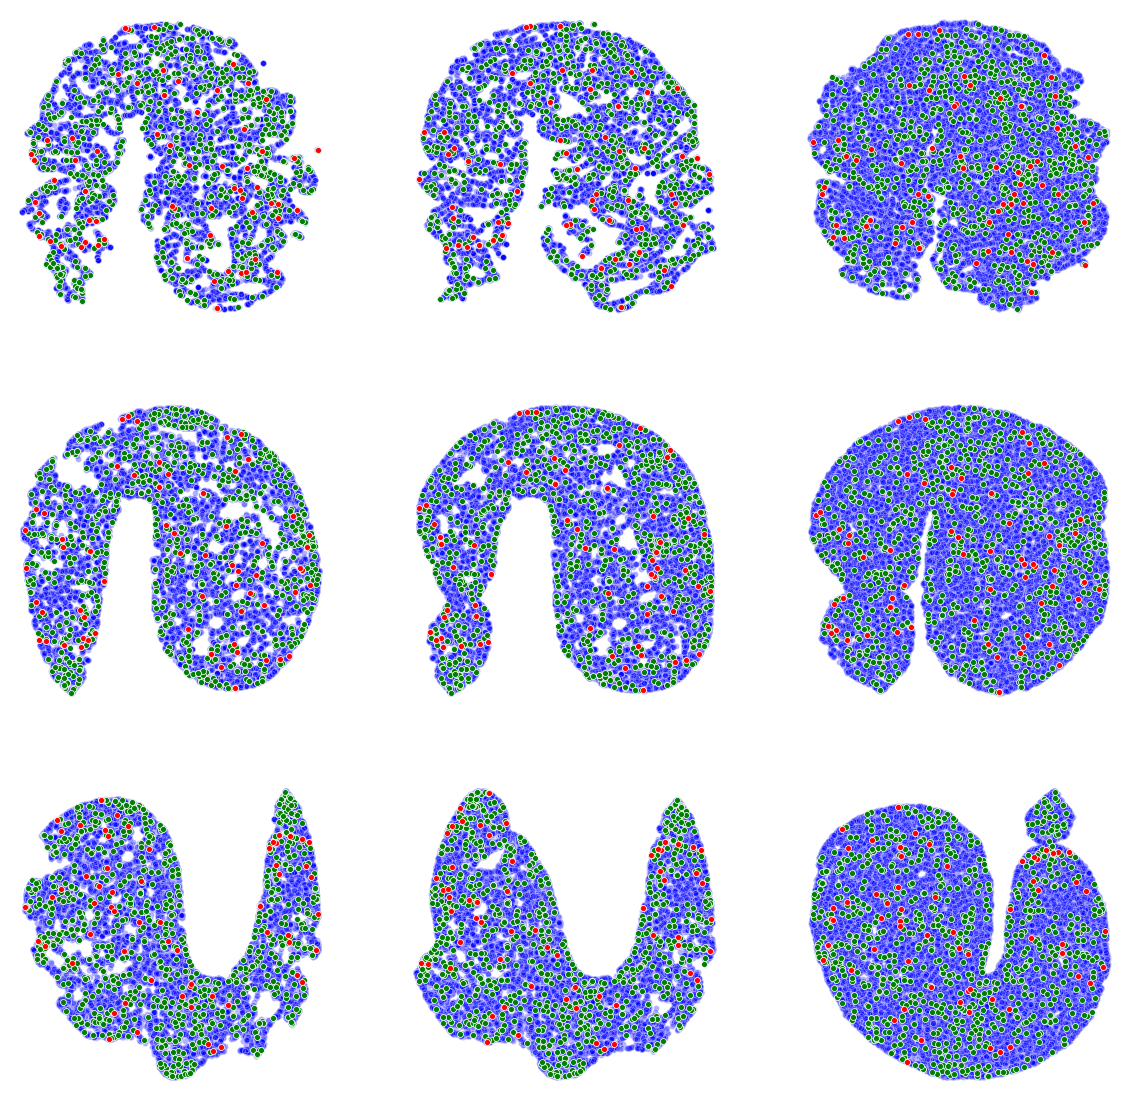

In [25]:
# This uses all data except from loop positions, and the fraction of positions coming from each structural element
col_data = [ i for i in pocket_features_no_loops.columns if i not in ['class','opening','Lf','Hf','Ef'] ]
all_atom_data_loop = pocket_features_no_loops[col_data]

nn = [5, 15, 45]
md = [ 0.05, 0.1, 0.5]

fig, ax = plt.subplots(len(md),len(nn),figsize=(20,20))

for i,n_neighbours in enumerate(nn):
    for j,min_dist in enumerate(md):
        reducer = umap.UMAP(random_state=0, n_neighbors=n_neighbours, min_dist=min_dist)

        embedding = reducer.fit_transform(all_atom_data_loop)

        pocket_features['e1'] = embedding[:,0]
        pocket_features['e2'] = embedding[:,1]

        final_set = pocket_features.loc[(pocket_features['class'] == 'dn_rd2') | (pocket_features['class'] == 'final_set')]
        sns.scatterplot(final_set['e1'],final_set['e2'],color='b',marker='o',alpha=0.3,ax=ax[i][j])
        dn_docked = pocket_features.loc[pocket_features['class'] == 'dn_docked']
        sns.scatterplot(dn_docked['e1'],dn_docked['e2'],color='g',marker='o',ax=ax[i][j])
        nat = pocket_features.loc[pocket_features['class'] == 'nat']
        sns.scatterplot(nat['e1'],nat['e2'],color='r',marker='o',ax=ax[i][j])
        ax[i][j].axis('off')
plt.show()